In [1]:
!pip install nltk spacy pandas matplotlib seaborn
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 104.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/Reddit_Data.csv")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.dropna(how="all")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df["length"] = df["clean_comment"].str.split().str.len()
df.head()

,clean_comment,category,length
0,family mormon have never tried explain them t...,1,39.0
1,buddhism has very much lot compatible with chr...,1,196.0
2,seriously don say thing first all they won get...,-1,86.0
3,what you have learned yours and only yours wha...,0,29.0
4,for your own benefit you may want read living ...,1,112.0


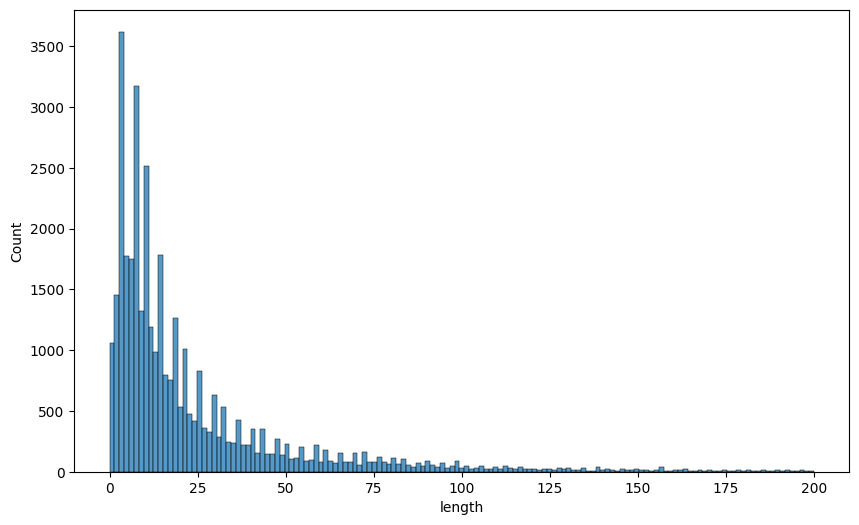

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df["length"], binrange=(0,200))
plt.show()

In [6]:
import re

def count_elements(comment):
    # Convert comment to string to handle potential non-string values
    comment_str = str(comment)
    hashtags = re.findall(r'#\w+', comment_str)
    mentions = re.findall(r'@\w+', comment_str)
    urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', comment_str)
    return len(hashtags), len(mentions), len(urls)

df['hashtag_count'], df['mention_count'], df['url_count'] = zip(*df['clean_comment'].apply(count_elements))

print("Hashtag counts:")
display(df['hashtag_count'].value_counts().sort_index())

print("\nMention counts:")
display(df['mention_count'].value_counts().sort_index())

print("\nURL counts:")
display(df['url_count'].value_counts().sort_index())

Hashtag counts:


,count
hashtag_count,
0,37249



Mention counts:


,count
mention_count,
0,37249



URL counts:


,count
url_count,
0,37249


In [7]:
def lower_column(df, column_name):
    df[column_name] = df[column_name].str.lower()



In [8]:
def remove_elements(df, column_name):
    df[column_name] = df[column_name].str.replace(r'#\w+', '', regex=True)
    df[column_name] = df[column_name].str.replace(r'@\w+', '', regex=True)
    df[column_name] = df[column_name].str.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)
    df[column_name] = df[column_name].str.replace(r'!@#$%^&*()', '', regex=True)


In [9]:
import re

def remove_emojis(text):
    # Regex to remove various forms of emojis and symbols
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))



In [10]:
CONTRACTION_MAP = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot",
    "can't've": "cannot have", "'cause": "because", "could've": "could have",
    "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not",
    "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",
    "isn't": "is not", "it's": "it is", "ma'am": "madam", "might've": "might have",
    "mightn't": "might not", "mightn't've": "might not have", "must've": "must have",
    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
    "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not",
    "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is",
    "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
    "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have",
    "that's": "that is", "there'd": "there would", "there'd've": "there would have",
    "there's": "there is", "they'd": "they would", "they'd've": "they would have",
    "they'll": "they will", "they'll've": "they will have", "they're": "they are",
    "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
    "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
    "what'll've": "what will have", "what're": "what are", "what's": "what is",
    "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where would",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have",
    "who're": "who are", "who's": "who is", "who've": "who have", "why's": "why is",
    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
    "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
    "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
    "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would",
    "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
    "you're": "you are", "you've": "you have"
}

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) \
            if contraction_mapping.get(match) else contraction_mapping.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def remove_repeated_characters(text):
    return re.sub(r'(.)\1+', r'\1', text)


In [11]:
def clean_text(df,column):
  lower_column(df,column)
  remove_elements(df,column)
  df[column] = df[column].apply(remove_emojis)
  df[column] = df[column].apply(expand_contractions)
  df[column] = df[column].apply(remove_repeated_characters)



In [13]:
from nltk import word_tokenize
import nltk

# Download the 'punkt_tab' resource if not already present
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


df["word_Tokenised comment"]=df["clean_comment"].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,clean_comment,category,length,hashtag_count,mention_count,url_count,word_Tokenised comment
0,family mormon have never tried explain them t...,1,39.0,0,0,0,"[family, mormon, have, never, tried, explain, ..."
1,budhism has very much lot compatible with chri...,1,196.0,0,0,0,"[budhism, has, very, much, lot, compatible, wi..."
2,seriously don say thing first al they won get ...,-1,86.0,0,0,0,"[seriously, don, say, thing, first, al, they, ..."
3,what you have learned yours and only yours wha...,0,29.0,0,0,0,"[what, you, have, learned, yours, and, only, y..."
4,for your own benefit you may want read living ...,1,112.0,0,0,0,"[for, your, own, benefit, you, may, want, read..."


In [14]:
from nltk import sent_tokenize
df["sentence_Tokenised comment"]=df["clean_comment"].apply(sent_tokenize)
df.head()

,clean_comment,category,length,hashtag_count,mention_count,url_count,word_Tokenised comment,sentence_Tokenised comment
0,family mormon have never tried explain them t...,1,39.0,0,0,0,"[family, mormon, have, never, tried, explain, ...",[ family mormon have never tried explain them ...
1,budhism has very much lot compatible with chri...,1,196.0,0,0,0,"[budhism, has, very, much, lot, compatible, wi...",[budhism has very much lot compatible with chr...
2,seriously don say thing first al they won get ...,-1,86.0,0,0,0,"[seriously, don, say, thing, first, al, they, ...",[seriously don say thing first al they won get...
3,what you have learned yours and only yours wha...,0,29.0,0,0,0,"[what, you, have, learned, yours, and, only, y...",[what you have learned yours and only yours wh...
4,for your own benefit you may want read living ...,1,112.0,0,0,0,"[for, your, own, benefit, you, may, want, read...",[for your own benefit you may want read living...


In [15]:
df["split_comment"]=df["clean_comment"].str.split()

In [16]:
df.head()

,clean_comment,category,length,hashtag_count,mention_count,url_count,word_Tokenised comment,sentence_Tokenised comment,split_comment
0,family mormon have never tried explain them t...,1,39.0,0,0,0,"[family, mormon, have, never, tried, explain, ...",[ family mormon have never tried explain them ...,"[family, mormon, have, never, tried, explain, ..."
1,budhism has very much lot compatible with chri...,1,196.0,0,0,0,"[budhism, has, very, much, lot, compatible, wi...",[budhism has very much lot compatible with chr...,"[budhism, has, very, much, lot, compatible, wi..."
2,seriously don say thing first al they won get ...,-1,86.0,0,0,0,"[seriously, don, say, thing, first, al, they, ...",[seriously don say thing first al they won get...,"[seriously, don, say, thing, first, al, they, ..."
3,what you have learned yours and only yours wha...,0,29.0,0,0,0,"[what, you, have, learned, yours, and, only, y...",[what you have learned yours and only yours wh...,"[what, you, have, learned, yours, and, only, y..."
4,for your own benefit you may want read living ...,1,112.0,0,0,0,"[for, your, own, benefit, you, may, want, read...",[for your own benefit you may want read living...,"[for, your, own, benefit, you, may, want, read..."


In [17]:
print("Comparison of Tokenization Methods:")
print("\nWord Tokenization Example:")
display(df["word_Tokenised comment"].head())

print("\nSentence Tokenization Example:")
display(df["sentence_Tokenised comment"].head())

print("\nSplit Comment Example:")
display(df["split_comment"].head())

Comparison of Tokenization Methods:

Word Tokenization Example:


,word_Tokenised comment
0,"[family, mormon, have, never, tried, explain, ..."
1,"[budhism, has, very, much, lot, compatible, wi..."
2,"[seriously, don, say, thing, first, al, they, ..."
3,"[what, you, have, learned, yours, and, only, y..."
4,"[for, your, own, benefit, you, may, want, read..."



Sentence Tokenization Example:


,sentence_Tokenised comment
0,[ family mormon have never tried explain them ...
1,[budhism has very much lot compatible with chr...
2,[seriously don say thing first al they won get...
3,[what you have learned yours and only yours wh...
4,[for your own benefit you may want read living...



Split Comment Example:


,split_comment
0,"[family, mormon, have, never, tried, explain, ..."
1,"[budhism, has, very, much, lot, compatible, wi..."
2,"[seriously, don, say, thing, first, al, they, ..."
3,"[what, you, have, learned, yours, and, only, y..."
4,"[for, your, own, benefit, you, may, want, read..."


In [18]:
from nltk.corpus import stopwords
import nltk

# Download the 'stopwords' resource if not already present
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

df['word_Tokenised comment']=df['word_Tokenised comment'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
df.head()

,clean_comment,category,length,hashtag_count,mention_count,url_count,word_Tokenised comment,sentence_Tokenised comment,split_comment
0,family mormon have never tried explain them t...,1,39.0,0,0,0,"[family, mormon, never, tried, explain, stil, ...",[ family mormon have never tried explain them ...,"[family, mormon, have, never, tried, explain, ..."
1,budhism has very much lot compatible with chri...,1,196.0,0,0,0,"[budhism, much, lot, compatible, christianity,...",[budhism has very much lot compatible with chr...,"[budhism, has, very, much, lot, compatible, wi..."
2,seriously don say thing first al they won get ...,-1,86.0,0,0,0,"[seriously, say, thing, first, al, get, comple...",[seriously don say thing first al they won get...,"[seriously, don, say, thing, first, al, they, ..."
3,what you have learned yours and only yours wha...,0,29.0,0,0,0,"[learned, want, teach, diferent, focus, goal, ...",[what you have learned yours and only yours wh...,"[what, you, have, learned, yours, and, only, y..."
4,for your own benefit you may want read living ...,1,112.0,0,0,0,"[benefit, may, want, read, living, budha, livi...",[for your own benefit you may want read living...,"[for, your, own, benefit, you, may, want, read..."


In [21]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
df['word_Tokenised comment']=df['word_Tokenised comment'].apply(lambda x: [stemmer.stem(word) for word in x])
df.head()

,clean_comment,category,length,hashtag_count,mention_count,url_count,word_Tokenised comment,sentence_Tokenised comment,split_comment,pos_tags
0,family mormon have never tried explain them t...,1,39.0,0,0,0,"[famili, mormon, never, tri, explain, stil, st...",[ family mormon have never tried explain them ...,"[family, mormon, have, never, tried, explain, ...","[(family, NN), (mormon, NN), (never, RB), (tri..."
1,budhism has very much lot compatible with chri...,1,196.0,0,0,0,"[budhism, much, lot, compat, christian, especi...",[budhism has very much lot compatible with chr...,"[budhism, has, very, much, lot, compatible, wi...","[(budhism, NN), (much, JJ), (lot, NN), (compat..."
2,seriously don say thing first al they won get ...,-1,86.0,0,0,0,"[serious, say, thing, first, al, get, complex,...",[seriously don say thing first al they won get...,"[seriously, don, say, thing, first, al, they, ...","[(seriously, RB), (say, VB), (thing, NN), (fir..."
3,what you have learned yours and only yours wha...,0,29.0,0,0,0,"[learn, want, teach, difer, focu, goal, wrape,...",[what you have learned yours and only yours wh...,"[what, you, have, learned, yours, and, only, y...","[(learned, VBN), (want, VBP), (teach, JJ), (di..."
4,for your own benefit you may want read living ...,1,112.0,0,0,0,"[benefit, may, want, read, live, budha, live, ...",[for your own benefit you may want read living...,"[for, your, own, benefit, you, may, want, read...","[(benefit, NN), (may, MD), (want, VB), (read, ..."


In [19]:
from nltk.stem import WordNetLemmatizer
import nltk

# Download the 'wordnet' resource if not already present
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

lemmatizer=WordNetLemmatizer()
df['word_Tokenised comment']=df['word_Tokenised comment'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,length,hashtag_count,mention_count,url_count,word_Tokenised comment,sentence_Tokenised comment,split_comment
0,family mormon have never tried explain them t...,1,39.0,0,0,0,"[family, mormon, never, tried, explain, stil, ...",[ family mormon have never tried explain them ...,"[family, mormon, have, never, tried, explain, ..."
1,budhism has very much lot compatible with chri...,1,196.0,0,0,0,"[budhism, much, lot, compatible, christianity,...",[budhism has very much lot compatible with chr...,"[budhism, has, very, much, lot, compatible, wi..."
2,seriously don say thing first al they won get ...,-1,86.0,0,0,0,"[seriously, say, thing, first, al, get, comple...",[seriously don say thing first al they won get...,"[seriously, don, say, thing, first, al, they, ..."
3,what you have learned yours and only yours wha...,0,29.0,0,0,0,"[learned, want, teach, diferent, focus, goal, ...",[what you have learned yours and only yours wh...,"[what, you, have, learned, yours, and, only, y..."
4,for your own benefit you may want read living ...,1,112.0,0,0,0,"[benefit, may, want, read, living, budha, livi...",[for your own benefit you may want read living...,"[for, your, own, benefit, you, may, want, read..."


In [20]:
from nltk import pos_tag
import nltk

# Download the 'averaged_perceptron_tagger_eng' resource if not already present
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')

df["pos_tags"]=df["word_Tokenised comment"].apply(pos_tag)
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,clean_comment,category,length,hashtag_count,mention_count,url_count,word_Tokenised comment,sentence_Tokenised comment,split_comment,pos_tags
0,family mormon have never tried explain them t...,1,39.0,0,0,0,"[family, mormon, never, tried, explain, stil, ...",[ family mormon have never tried explain them ...,"[family, mormon, have, never, tried, explain, ...","[(family, NN), (mormon, NN), (never, RB), (tri..."
1,budhism has very much lot compatible with chri...,1,196.0,0,0,0,"[budhism, much, lot, compatible, christianity,...",[budhism has very much lot compatible with chr...,"[budhism, has, very, much, lot, compatible, wi...","[(budhism, NN), (much, JJ), (lot, NN), (compat..."
2,seriously don say thing first al they won get ...,-1,86.0,0,0,0,"[seriously, say, thing, first, al, get, comple...",[seriously don say thing first al they won get...,"[seriously, don, say, thing, first, al, they, ...","[(seriously, RB), (say, VB), (thing, NN), (fir..."
3,what you have learned yours and only yours wha...,0,29.0,0,0,0,"[learned, want, teach, diferent, focus, goal, ...",[what you have learned yours and only yours wh...,"[what, you, have, learned, yours, and, only, y...","[(learned, VBN), (want, VBP), (teach, JJ), (di..."
4,for your own benefit you may want read living ...,1,112.0,0,0,0,"[benefit, may, want, read, living, budha, livi...",[for your own benefit you may want read living...,"[for, your, own, benefit, you, may, want, read...","[(benefit, NN), (may, MD), (want, VB), (read, ..."


In [12]:
from nltk.stem import SnowballStemmer,WordNetLemmatizer,PorterStemmer
from nltk import word_tokenize,pos_tag
from nltk.corpus import stopwords
import nltk
def nltk_process(df,column):
  clean_text(df,column)
  lemmatizer=WordNetLemmatizer()
  stemmer=PorterStemmer()
  stemmer2=SnowballStemmer("english")
  df["word_Tokenised comment"]=df[column].apply(word_tokenize)
  df['word_Tokenised comment']=df['word_Tokenised comment'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
  df['word_Tokenised comment_Stem_port']=df['word_Tokenised comment'].apply(lambda x: [stemmer.stem(word) for word in x])
  df['word_Tokenised comment_Stem_Snowball']=df['word_Tokenised comment'].apply(lambda x: [stemmer2.stem(word) for word in x])
  df['word_Tokenised comment']=df['word_Tokenised comment'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
  df["pos_tags"]=df["word_Tokenised comment"].apply(pos_tag)
  return df


In [16]:
from collections import Counter
nltk_process(df,"clean_comment")

def extract_nouns_adjectives(pos_tags):
    # Extract words that are nouns (NN, NNS, NNP, NNPS) or adjectives (JJ, JJS, JJR)
    return [word for (word, tag) in pos_tags if tag.startswith('NN') or tag.startswith('JJ')]

df['nouns_adjectives'] = df['pos_tags'].apply(extract_nouns_adjectives)

# Flatten the list of lists into a single list for analysis
all_nouns_adjectives = [word for sublist in df['nouns_adjectives'] for word in sublist]

# Analyze the distribution of nouns and adjectives
pos_distribution = Counter(all_nouns_adjectives)

print("Most common nouns and adjectives:")
display(pos_distribution.most_common(20))

Most common nouns and adjectives:


[('people', 5581),
 ('wil', 5371),
 ('india', 4456),
 ('modi', 4427),
 ('bjp', 4360),
 ('al', 3864),
 ('god', 3396),
 ('time', 2917),
 ('indian', 2608),
 ('thing', 2562),
 ('party', 2354),
 ('country', 2329),
 ('government', 2202),
 ('year', 2150),
 ('’', 2025),
 ('congres', 1885),
 ('way', 1815),
 ('ben', 1759),
 ('state', 1674),
 ('lot', 1606)]

Testing processing time for different dataset sizes:
Processing 1000 rows...
  Processing time: 6.25 seconds
Processing 5000 rows...
  Processing time: 29.61 seconds
Processing 10000 rows...
  Processing time: 40.72 seconds
Processing 20000 rows...
  Processing time: 79.84 seconds
Processing 30000 rows...
  Processing time: 120.12 seconds
Processing 37249 rows...
  Processing time: 145.41 seconds


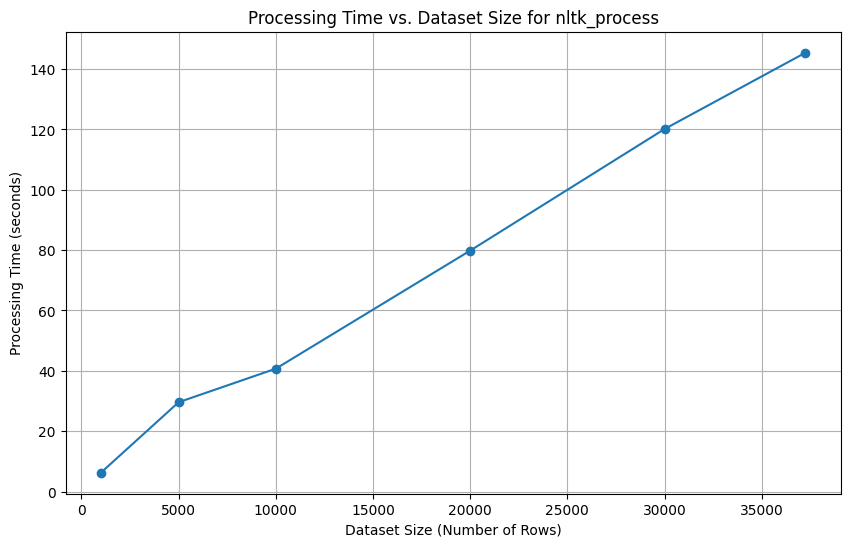

[160.0148878597828, 168.86696370282095, 245.5642392580165, 250.50841414483605, 249.74750227876095, 256.1685281442378]


In [13]:
import time
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your original DataFrame and nltk_process is defined

dataset_sizes = [1000, 5000, 10000, 20000, 30000, len(df)]  # Define different dataset sizes to test
processing_times = []

print("Testing processing time for different dataset sizes:")
for size in dataset_sizes:
    if size > len(df):
        size = len(df) # Ensure size does not exceed the total number of rows
    print(f"Processing {size} rows...")
    # Take a sample of the DataFrame for the current size
    df_subset = df.sample(n=size, random_state=42).copy() # Use .copy() to avoid SettingWithCopyWarning

    start_time = time.time()
    # Process the subset using the nltk_process function
    nltk_process(df_subset, "clean_comment")
    end_time = time.time()

    processing_time = end_time - start_time
    processing_times.append(processing_time)
    print(f"  Processing time: {processing_time:.2f} seconds")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, processing_times, marker='o', linestyle='-')
plt.xlabel("Dataset Size (Number of Rows)")
plt.ylabel("Processing Time (seconds)")
plt.title("Processing Time vs. Dataset Size for nltk_process")
plt.grid(True)
plt.show()

tweet_per_process=[]
k=0
for i in processing_times:
  tweet_per_process.append(dataset_sizes[k]/i)
  k+=1
print(tweet_per_process)

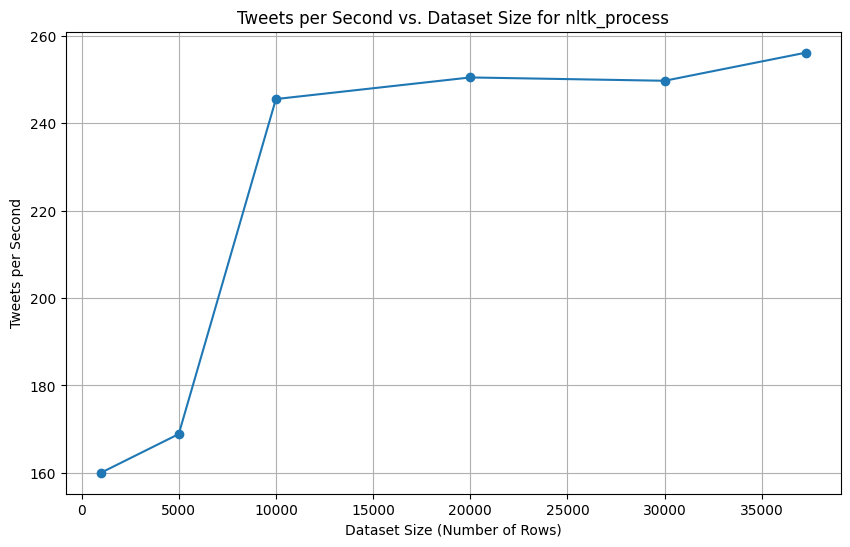

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, tweet_per_process, marker='o', linestyle='-')
plt.xlabel("Dataset Size (Number of Rows)")
plt.ylabel("Tweets per Second")
plt.title("Tweets per Second vs. Dataset Size for nltk_process")
plt.grid(True)
plt.show()